In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import models
from keras import optimizers
from keras import regularizers
from keras import callbacks
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

In [ ]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
data.head()
X = data.drop(['MEDV'],axis=1).to_numpy()
y = data['MEDV'].to_numpy()
train_data, test_data, train_targets, test_targets = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# A couple of functions to be used several times in this project

# Get the weights of all layers (excluding the output layer)
def calculate_mean_absolute_weights(model, input_shape):
    """
    Calculate mean absolute weights for each feature across all layers in a neural network.
    
    Parameters:
    - model: Trained Keras model (Sequential or Functional).
    - input_shape: Shape of the input data (number of features).
    
    Returns:
    - mean_absolute_weights: A numpy array containing mean absolute weights for each feature.
    """
    # Initialize a list to store mean absolute weights per variable (feature)
    mean_absolute_weights = []
    
    # Get the weights of each layer in the model
    layer_weights = [layer.get_weights()[0] for layer in model.layers if len(layer.get_weights()) > 0]
    
    # Loop through each variable (feature)
    for feature_index in range(input_shape[1]):
        abs_weights = []
        
        # For each layer's weights, find the associated weight for the current feature
        for weight_matrix in layer_weights:
            # The feature corresponds to the columns of the weight matrix
            if weight_matrix.shape[1] > feature_index:
                # Get the absolute weight for the current feature across all neurons in this layer
                abs_weights.extend(np.abs(weight_matrix[:, feature_index]))  # For each neuron in the layer
        
        # Calculate the mean of the absolute weights for this feature
        mean_abs_weight = np.mean(abs_weights)
        mean_absolute_weights.append(mean_abs_weight)
    
    # Convert to a numpy array for easier analysis
    mean_absolute_weights = np.array(mean_absolute_weights)
    
    return mean_absolute_weights

    
def train_and_stop_model(model, X_train, y_train):

    # Define the early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model with early stopping
    history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[early_stopping], verbose=2)
    
    # Determine the stopped epoch based on the history
    stopped_epoch = len(history.history['loss'])
    
    # Return the history and stopped epoch
    return stopped_epoch

def plot_mean_absolute_weights_bar(model):
    mean_abs_weights = calculate_mean_absolute_weights(model, X_train_scaled.shape)

    plt.bar(range(X_train_scaled.shape[1]), mean_abs_weights)
    plt.xlabel('Feature Index')
    plt.ylabel('Mean Absolute Weight')

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_data)
X_test_scaled = scaler.transform(test_data)

# Model 1: Simple Feedforward Network
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(0.001)),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')


# Train the model
model.fit(X_train_scaled, train_targets, epochs=100, validation_split=0.2, verbose=2)

# Evaluate the model
y_pred_nn_1 = model.predict(X_test_scaled)
mse_nn_1 = mean_squared_error(test_targets, y_pred_nn_1)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, train_targets)

# Neural Network Predictions
y_pred_nn = model.predict(X_test_scaled)

# Lasso Predictions
y_pred_lasso = lasso.predict(X_test_scaled)

# Calculate performance metrics
mse_nn = mean_squared_error(test_targets, y_pred_nn)
r2_nn = r2_score(test_targets, y_pred_nn)

mse_lasso = mean_squared_error(test_targets, y_pred_lasso)
r2_lasso = r2_score(test_targets, y_pred_lasso)


Epoch 1/100


/Users/jo/Desktop/code everything/lu/capstone/boston/.conda/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 - 1s - 61ms/step - loss: 615.5870 - val_loss: 549.8162
Epoch 2/100
11/11 - 0s - 3ms/step - loss: 602.7640 - val_loss: 538.8505
Epoch 3/100
11/11 - 0s - 3ms/step - loss: 590.3897 - val_loss: 527.6694
Epoch 4/100
11/11 - 0s - 3ms/step - loss: 577.6105 - val_loss: 516.3433
Epoch 5/100
11/11 - 0s - 4ms/step - loss: 564.6009 - val_loss: 504.7109
Epoch 6/100
11/11 - 0s - 4ms/step - loss: 551.0969 - val_loss: 492.0492
Epoch 7/100
11/11 - 0s - 4ms/step - loss: 536.2839 - val_loss: 478.6533
Epoch 8/100
11/11 - 0s - 4ms/step - loss: 521.5093 - val_loss: 464.8252
Epoch 9/100
11/11 - 0s - 4ms/step - loss: 505.5792 - val_loss: 450.1616
Epoch 10/100
11/11 - 0s - 4ms/step - loss: 488.8159 - val_loss: 434.3977
Epoch 11/100
11/11 - 0s - 3ms/step - loss: 470.6128 - val_loss: 418.2705
Epoch 12/100
11/11 - 0s - 3ms/step - loss: 451.9890 - val_loss: 401.2121
Epoch 13/100
11/11 - 0s - 3ms/step - loss: 432.6274 - val_loss: 384.0022
Epoch 14/100
11/11 - 0s - 3ms/step - loss: 412.6403 - val_loss: 365.629

In [ ]:
print("Neural Network Performance:")
print(f"MSE: {mse_nn:.4f}, R²: {r2_nn:.4f}")

print("\nLasso Regression Performance:")
print(f"MSE: {mse_lasso:.4f}, R²: {r2_lasso:.4f}")

Neural Network Performance:
MSE: 25.4843, R²: 0.6525

Lasso Regression Performance:
MSE: 25.6567, R²: 0.6501


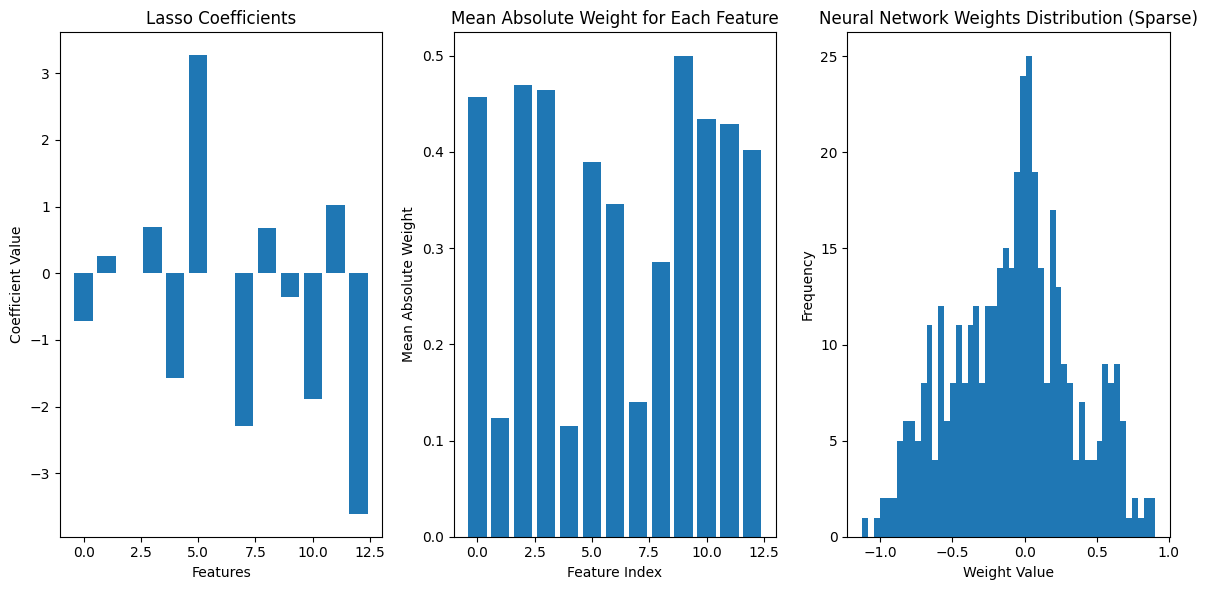

In [ ]:
# Lasso regression coefficients
lasso_coefficients = lasso.coef_
mean_abs_weights = calculate_mean_absolute_weights(model, X_train_scaled.shape)

# Plot Lasso coefficients
plt.figure(figsize=(12,5))
plt.subplot(1, 3, 1)
plt.bar(range(len(lasso_coefficients)), lasso_coefficients)
plt.title('Lasso Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')

# Plot the average magnitude of neural network weights 
plt.subplot(1, 3, 2)
plt.bar(range(X_train_scaled.shape[1]), mean_abs_weights)
plt.xlabel('Feature Index')
plt.ylabel('Mean Absolute Weight')
plt.title('Mean Absolute Weight for Each Feature')

nn_weights_layer_1 = model.layers[0].get_weights()[0]  # Weights for first layer

# Visualizing sparsity in the neural network weights
plt.subplot(1, 3, 3)
plt.hist(nn_weights_layer_1.flatten(), bins=50)
plt.title('Neural Network Weights Distribution (Sparse)')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# Assuming X_test_scaled contains the scaled features, and test_targets is the target variable (MEDV)
# Extract TAX (Feature 10) and TAX (Feature 6) for plotting
tax = X_test_scaled[:, 9]  # TAX is feature 10
rm = X_test_scaled[:, 5]  # RM is feature 6
medv = test_targets  # Target variable (MEDV)

# Plot 1: TAX vs. MEDV with smooth line
plt.figure(figsize=(12, 5))

# Scatterplot for TAX vs. MEDV
plt.subplot(1, 2, 1)
sns.regplot(x=tax, y=medv, scatter_kws={'s': 10}, line_kws={'color': 'red', 'lw': 2})
plt.title("TAX vs. MEDV with Smooth Line")
plt.xlabel("TAX (Full-value property-tax rate per $10,000)")
plt.ylabel("MEDV (House Prices in $1000s)")

# Plot 2: RM vs. MEDV with smooth line
plt.subplot(1, 2, 2)
sns.regplot(x=rm, y=medv, scatter_kws={'s': 10}, line_kws={'color': 'blue', 'lw': 2})
plt.title("RM vs. MEDV with Smooth Line")
plt.xlabel("RM (Average Number of Rooms per Dwelling)")

# Show plots
plt.tight_layout()
plt.show()

In [ ]:
wide_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(0.001)),
    Dense(1)
])

wide_model.compile(optimizer='adam', loss='mse')

no_l2_wide_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)), 
    Dense(1)  
])

no_l2_wide_model.compile(optimizer='adam', loss='mse')


/Users/jo/Desktop/code everything/lu/capstone/boston/.conda/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_1 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(0.001)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(16, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(1)
])

model_1.compile(optimizer='adam', loss='mse')


In [ ]:
model_2 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(0.001)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(1)
])

model_2.compile(optimizer='adam', loss='mse')


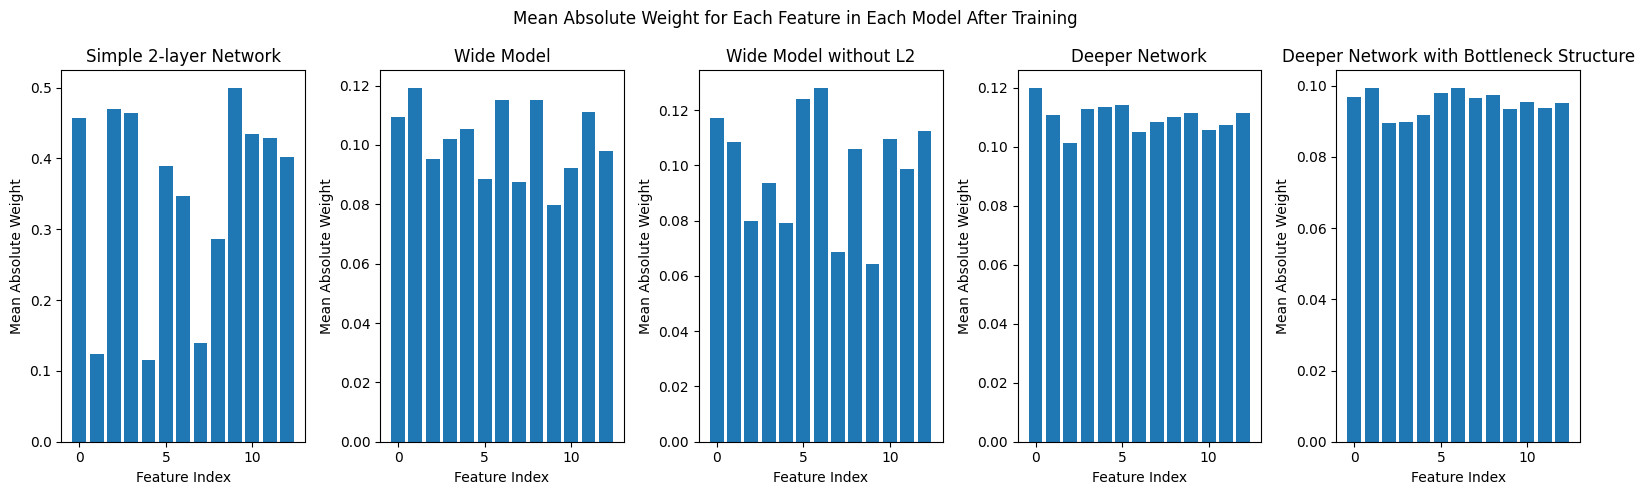

In [ ]:
plt.figure(figsize=(16,5))
plt.suptitle('Mean Absolute Weight for Each Feature in Each Model After Training')

plt.subplot(1, 5, 1)
plot_mean_absolute_weights_bar(model)
plt.title('Simple 2-layer Network')
plt.subplot(1, 5, 2)
plot_mean_absolute_weights_bar(wide_model)
plt.title('Wide Model')
plt.subplot(1, 5, 3)
plot_mean_absolute_weights_bar(no_l2_wide_model)
plt.title('Wide Model without L2')
plt.subplot(1, 5, 4)
plot_mean_absolute_weights_bar(model_1)
plt.title('Deeper Network')
plt.subplot(1, 5, 5)
plot_mean_absolute_weights_bar(model_2)
plt.title('Deeper Network with Bottleneck Structure')

plt.tight_layout()
plt.show()

In [ ]:
wide_SE = train_and_stop_model(wide_model, X_train_scaled, train_targets) #SE = stopped epoch
wide_nol2_SE = train_and_stop_model(no_l2_wide_model, X_train_scaled, train_targets)
m1_SE = train_and_stop_model(model_1, X_train_scaled, train_targets)
m2_SE = train_and_stop_model(model_2, X_train_scaled, train_targets)

y_pred_nn_1 = model_1.predict(X_test_scaled)
simple_mse = mean_squared_error(test_targets, y_pred_nn_1)

y_pred_nn_2 = model_2.predict(X_test_scaled)
deep_mse = mean_squared_error(test_targets, y_pred_nn_2)

y_pred_nn_3 = wide_model.predict(X_test_scaled)
wide_mse = mean_squared_error(test_targets, y_pred_nn_3)

y_pred_nn_4 = no_l2_wide_model.predict(X_test_scaled)
no_l2_wide_mse = mean_squared_error(test_targets, y_pred_nn_4)

Epoch 1/100
11/11 - 0s - 45ms/step - loss: 591.5349 - val_loss: 521.4746
Epoch 2/100
11/11 - 0s - 3ms/step - loss: 564.9455 - val_loss: 497.8582
Epoch 3/100
11/11 - 0s - 4ms/step - loss: 538.1072 - val_loss: 473.5172
Epoch 4/100
11/11 - 0s - 3ms/step - loss: 510.2770 - val_loss: 446.6320
Epoch 5/100
11/11 - 0s - 3ms/step - loss: 478.2017 - val_loss: 417.7841
Epoch 6/100
11/11 - 0s - 3ms/step - loss: 444.7902 - val_loss: 387.2505
Epoch 7/100
11/11 - 0s - 3ms/step - loss: 409.7610 - val_loss: 355.6190
Epoch 8/100
11/11 - 0s - 4ms/step - loss: 374.4339 - val_loss: 323.1994
Epoch 9/100
11/11 - 0s - 3ms/step - loss: 337.9545 - val_loss: 290.3038
Epoch 10/100
11/11 - 0s - 4ms/step - loss: 301.3826 - val_loss: 258.2116
Epoch 11/100
11/11 - 0s - 4ms/step - loss: 266.7584 - val_loss: 226.3225
Epoch 12/100
11/11 - 0s - 4ms/step - loss: 233.2400 - val_loss: 196.4934
Epoch 13/100
11/11 - 0s - 4ms/step - loss: 202.1561 - val_loss: 169.4898
Epoch 14/100
11/11 - 0s - 4ms/step - loss: 174.7869 - val_l

In [ ]:
print(f"Simple 2-layer Network with 32 Neurons MSE: {mse_nn:.4f}")
print(f"Wide Model MSE: {wide_mse}")
print(f"Wide Model without L2 Regularization MSE: {no_l2_wide_mse}")
print(f"Deep Model MSE: {simple_mse}")
print(f"Deep bottleneck Model MSE: {deep_mse}")

Simple 2-layer Network with 32 Neurons MSE: 26.9476
Wide Model MSE: 16.683979459728906
Wide Model without L2 Regularization MSE: 17.686420363347782
Deep Model MSE: 13.85884265486435
Deep Bottle Neck Model MSE: 12.216108096197043
